###**Ý nghĩa của phép tính convolution trên ảnh trong xử lý ảnh**
Mục đích của phép tính convolution trên ảnh là làm mờ, làm nét ảnh; xác định các đường;… Mỗi kernel khác nhau thì phép tính convolution sẽ có ý nghĩa khác nhau.

Câu hỏi:
1. Tại sao dùng Identity ? -> Thay đổi kích thước ảnh nhưng vẫn giữ nguyên nội dung bức ảnh. Dùng edge detection, sharpen, blox blur để làm gì ?.
2. Ảnh sắc nét hơn, hoặc mờ hơn do cái gì thay đổi (giá trị pixel thay đổi như thế nào)?.
3. Đọc hiểu lại từng dòng code.

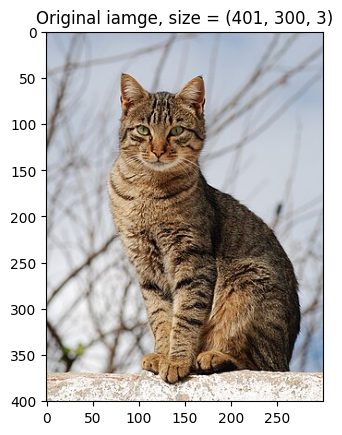

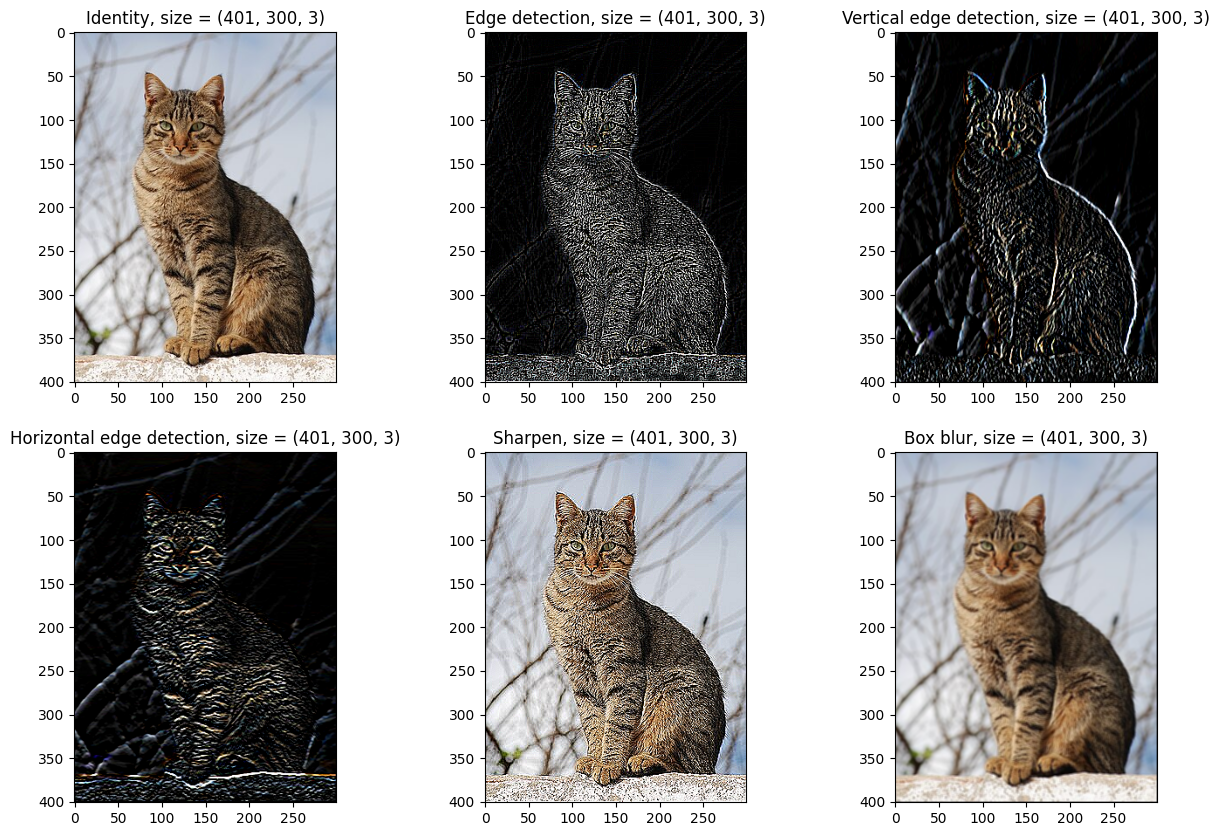

In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# Thực hiện phép tính tích chập trên ảnh với các kernel khác nhau.
def apply_convolution(img: np.array, kernel: np.array, stride: int = 1, padding: int = 0):

    # Get the height, width, and number of channels of the image
    height, width, c = img.shape

    # Get the height, width of the kernel
    kernel_height, kernel_width = kernel.shape

    # Calculate the dimensions of the output image after applying convolution with given padding
    out_height = (height + 2 * padding - kernel_height) // stride + 1
    out_width = (width + 2 * padding - kernel_width) // stride + 1

    # Create a new image of size out_height x out_width x number of channels
    new_img = np.zeros((out_height, out_width, c))

    # Apply zero padding to the input image
    padded_img = np.pad(img, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

    # Loop through each pixel in the output image
    for i in range(0, out_height):
        for j in range(0, out_width):
            # Compute the starting point of the current window
            row_start = i * stride
            row_end = row_start + kernel_height
            col_start = j * stride
            col_end = col_start + kernel_width

            # Extract a window of pixels around the current pixel from the padded image ~ receptive field
            window = padded_img[row_start:row_end, col_start:col_end]

            # Apply the convolution to the window and set the result as the value of the current pixel in the new image
            new_img[i, j, 0] = int((window[:, :, 0] * kernel).sum())
            new_img[i, j, 1] = int((window[:, :, 1] * kernel).sum())
            new_img[i, j, 2] = int((window[:, :, 2] * kernel).sum())

    # Clip values to the range 0-255
    new_img = np.clip(new_img, 0, 255)

    return new_img.astype(np.uint8)

if __name__ == "__main__":

  # kernel for Identity
  kernel1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

  # kernel for edge detection
  kernel2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

  # kernel for vertical edge detection
  kernel3 = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])

  # kernel for horizontal edge detection
  kernel4 = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

  # kernel for sharpen
  kernel5 = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])

  # Kernel for box blur
  kernel6 = np.array([[1/9, 1/9, 1/9],[1/9, 1/9, 1/9],[1/9, 1/9, 1/9]])

  # Open the image and convert it to an array
  urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/300px-Cat_November_2010-1a.jpg', 'meo.jpg')
  img = cv2.imread("meo.jpg")
  or_img = img.copy()

  # Tạo mảng chứa các bức ảnh convolution
  conv_kernel_names = ['Identity', 'Edge detection', 'Vertical edge detection', 'Horizontal edge detection', 'Sharpen', 'Box blur']
  conv_images = []

  for kernel in [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6]:
    conv_img = apply_convolution(or_img, kernel, 1, 1)
    conv_img = cv2.cvtColor(conv_img, cv2.COLOR_BGR2RGB) # Chuyen thu tu mau tu BGR (CV2) -> RGB (matplotlib)
    conv_images.append(conv_img)

  plt.imshow(cv2.cvtColor(or_img, cv2.COLOR_BGR2RGB))
  plt.title(f"Original iamge, size = {or_img.shape}")
  # Hiển thị 6 ảnh bằng Matplotlib
  fig, axes = plt.subplots(2, 3, figsize=(15, 10))

  for i, ax in enumerate(axes.flat):
    ax.imshow(conv_images[i])
    ax.set_title(f"{conv_kernel_names[i]}, size = {conv_images[i].shape}")

  plt.show()
